In [107]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np

# module loading settings
%load_ext autoreload
%autoreload 2

In [120]:
from src.preprocessing import pdf_to_df

raw = pdf_to_df(data_dir='../data/')
raw.head()

,file,text
0,../data/lijst-02-programma.pdf,n e d n o b r e v n ee g n i v e l sa m e n ve...
1,../data/lijst-09-programma.pdf,foto voorkant niek stam fotografie s...
2,../data/lijst-12-programma.pdf,verkiezingsprogramma november veilig...
3,../data/lijst-23-programma.pdf,verkiezingsprogramma libertarische partij ...
4,../data/lijst-24-programma.pdf,programma het programma van lokaal in de kamer...


In [130]:
def chunk_string(string, length):
    return [string[0+i:length+i] for i in range(0, len(string), length)]

df = raw['text'].apply(lambda x: pd.Series(chunk_string(x, length=2000))).stack().reset_index()
df.rename(columns={0: 'text'}, inplace=True)

print "{:d} text snippets".format(len(df))
df.head()

1476 text snippets


,level_0,level_1,text
0,0,0,n e d n o b r e v n ee g n i v e l sa m e n ve...
1,0,1,dereen onderwijs voor de wereldtop gelijke kan...
2,0,2,id en solidariteit over grenzen heen gaan een...
3,0,3,sociaaldemocraten zichzelf stellen en die kr...
4,0,4,waardig loon er zijn grenzen gesteld aan de i...


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

import nltk
from nltk.stem.snowball import DutchStemmer
import re

from sklearn.decomposition import LatentDirichletAllocation

# stemmer = DutchStemmer()
# def tokenize(text):
#     """Converts text to tokens."""
#     tokens = nltk.word_tokenize(text)
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

n_topics = 10

estimator = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(input=u'content', encoding=u'utf-8',
                                   decode_error=u'strict', strip_accents=None,
                                   lowercase=True, preprocessor=None, tokenizer=None,
                                   analyzer=u'word', stop_words=stopwords.words('dutch'), 
                                   ngram_range=(1, 1), max_df=1.0, min_df=0.0, max_features=None,
                                   vocabulary=None, binary=True, dtype=np.int64,
                                   norm=u'l2', use_idf=False, smooth_idf=False, sublinear_tf=False)),
    
    ('model', LatentDirichletAllocation(n_topics=n_topics, doc_topic_prior=None, topic_word_prior=None,
                                        learning_method='batch', learning_decay=0.7, learning_offset=10.0, 
                                        max_iter=20,
                                        batch_size=128, evaluate_every=-1, total_samples=1000000.0, perp_tol=0.1,
                                        mean_change_tol=0.001, max_doc_update_iter=100, n_jobs=1, verbose=0,
                                        random_state=None))])

estimator.fit_transform(df['text'].values)
estimator

Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer=u'word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None,
        ...ol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0))])

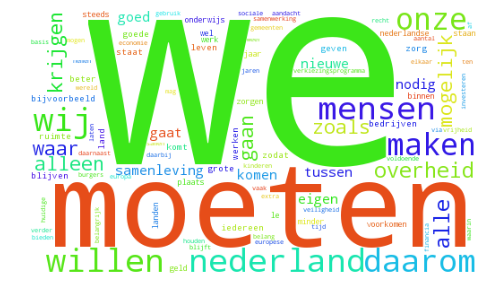

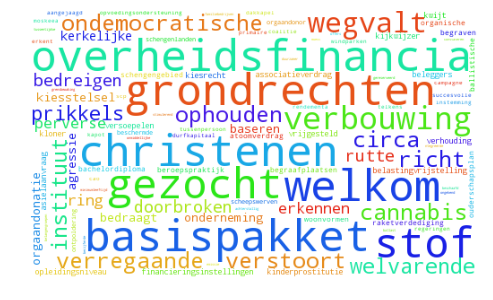

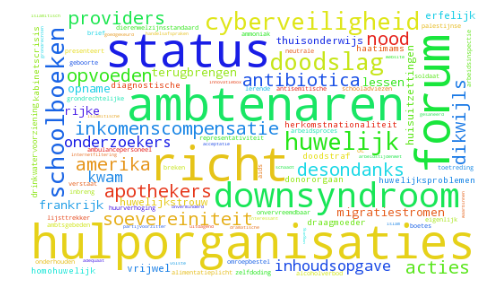

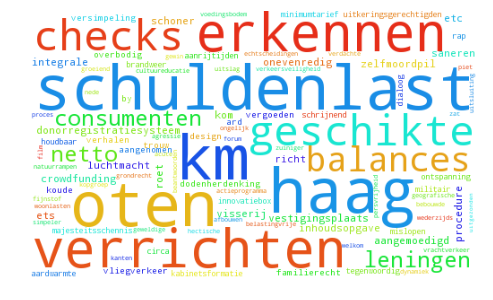

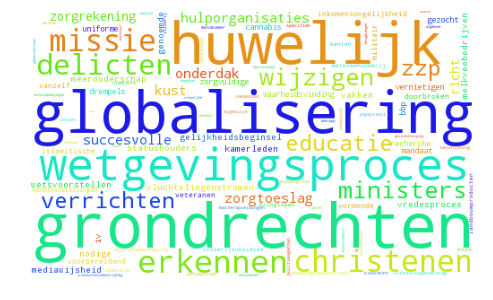

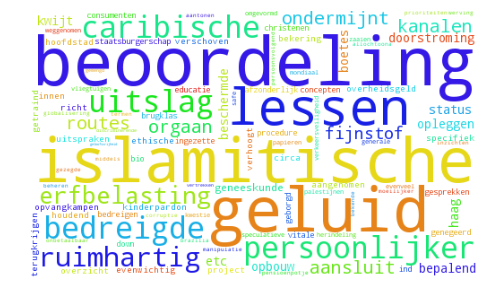

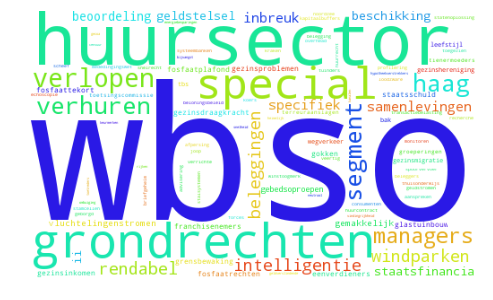

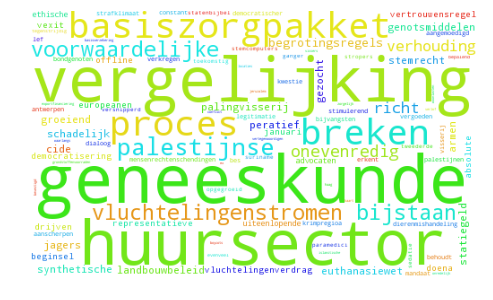

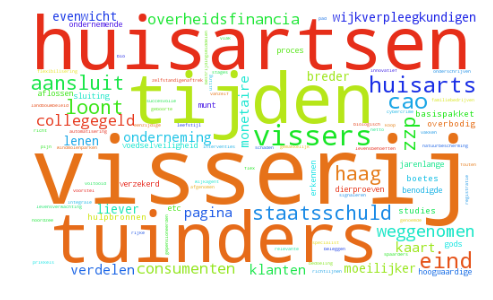

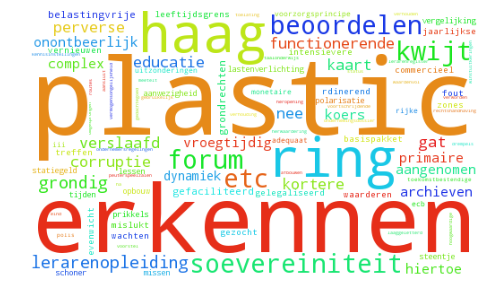

In [136]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
%matplotlib inline

def plot_word_cloud(words, components, n_top_words=3):   
    for topic_idx, weights in enumerate(components):
        wc = WordCloud(background_color="white", max_words=100, width=500, height=300)
        wc.generate_from_frequencies(zip(words, weights))
        plt.figure(figsize=(8,6))
        plt.imshow(wc)
        plt.axis("off")
        plt.show()
    
words = estimator.steps[0][1].get_feature_names()
components = estimator._final_estimator.components_

plot_word_cloud(words, components)